In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Fake_Real_Data.csv')

In [3]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [4]:
df.shape

(9900, 2)

In [5]:
df['label'] = df['label'].map({'Fake':0, 'Real':1})

In [6]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0
1,U.S. conservative leader optimistic of common ...,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",1
3,Court Forces Ohio To Allow Millions Of Illega...,0
4,Democrats say Trump agrees to work on immigrat...,1


In [7]:
df.label.value_counts()

label
0    5000
1    4900
Name: count, dtype: int64

In [8]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [11]:
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)

In [12]:
df.head()

,Text,label,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['vector'].values, df['label'], test_size = 0.2, random_state = 38, stratify = df['label'])

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [18]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

X_train_2d.shape

(7920, 300)

In [19]:
scaler = MinMaxScaler()
X_train_2d = scaler.fit_transform(X_train_2d)
X_test_2d = scaler.transform(X_test_2d)

In [20]:
clf = MultinomialNB()
clf.fit(X_train_2d, y_train)

MultinomialNB()

In [21]:
y_pred = clf.predict(X_test_2d)

In [22]:
print('Classification Report:\n', classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1000
           1       0.93      0.95      0.94       980

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980



<Axes: >

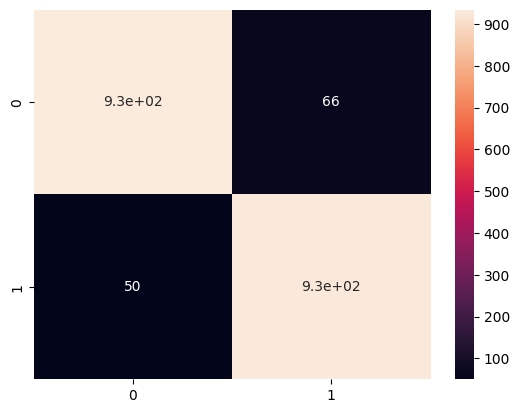

In [23]:
sns.heatmap(cm, annot = True)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_2d, y_train)
y_pred = clf.predict(X_test_2d)

In [26]:
print('Classification Report:\n', classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1000
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



<Axes: >

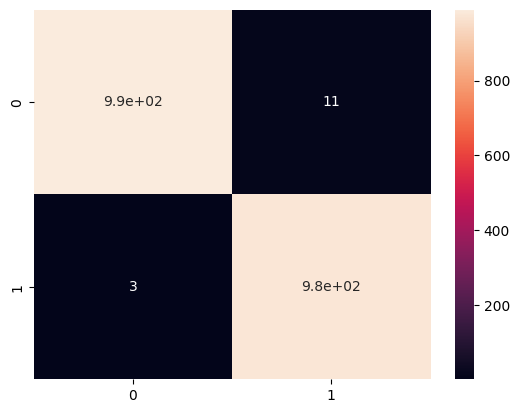

In [27]:
sns.heatmap(cm, annot = True)